# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Import Data

In [2]:
# membuat data frame untuk membaca data
df = pd.read_csv("dataset/bank-full.csv", sep=";")

**Keterangan**<br>
Penambahan parameter sep=";" dilakukan karena file bank-full.csv mempunyai tipe comma delimited

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Data Understanding

In [4]:
# mengecek struktur df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# melihat jumlah baris dan kolom
df.shape

(45211, 17)

In [6]:
# mendeskripsi numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# melihat unique values pada setiap kolom
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


# Data Preprocessing

In [8]:
# menggati nama dari kolom menjadi deposit
df_2 = df.rename(columns={"y":"deposit"})
# cek df_2 kolom
df_2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

**Keterangan**<br>
Kolom y sudah berubah menjadi deposit, penggantian nama ini dilakukan agar mempermudah dalam memahami data frame

In [9]:
# mencari missing values
df_2.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
# mengeksplorasi Categorical Features
categorical_features = [feature for feature in df_2.columns if ((df_2[feature].dtypes=="O") & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

**Keterangan**<br>
Tidak ada missing values

In [11]:
df_baru = df_2.copy() 
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
# melakukan standarisasi data yang memiliki tiped data int/numerical feature
scaler = StandardScaler()
numerical_features = [
    "age",
    "balance",
    "day",
    "campaign",
    "pdays",
    "previous"
]
df_baru[numerical_features] = scaler.fit_transform(df_baru[numerical_features])

**Keterangan**
* feature duration tidak dilakukan standarisasi karena akan sangat berpengaruh untuk outputnya

In [13]:
df_baru

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.411453,-0.251940,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.411453,-0.251940,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.411453,-0.251940,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.411453,-0.251940,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.411453,-0.251940,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,technician,married,tertiary,no,-0.176460,no,no,cellular,0.143418,nov,977,0.076230,-0.411453,-0.251940,unknown,yes
45207,2.831227,retired,divorced,primary,no,0.120447,no,no,cellular,0.143418,nov,456,-0.246560,-0.411453,-0.251940,unknown,yes
45208,2.925401,retired,married,secondary,no,1.429593,no,no,cellular,0.143418,nov,1127,0.721811,1.436189,1.050473,success,yes
45209,1.512791,blue-collar,married,secondary,no,-0.228024,no,no,telephone,0.143418,nov,508,0.399020,-0.411453,-0.251940,unknown,no


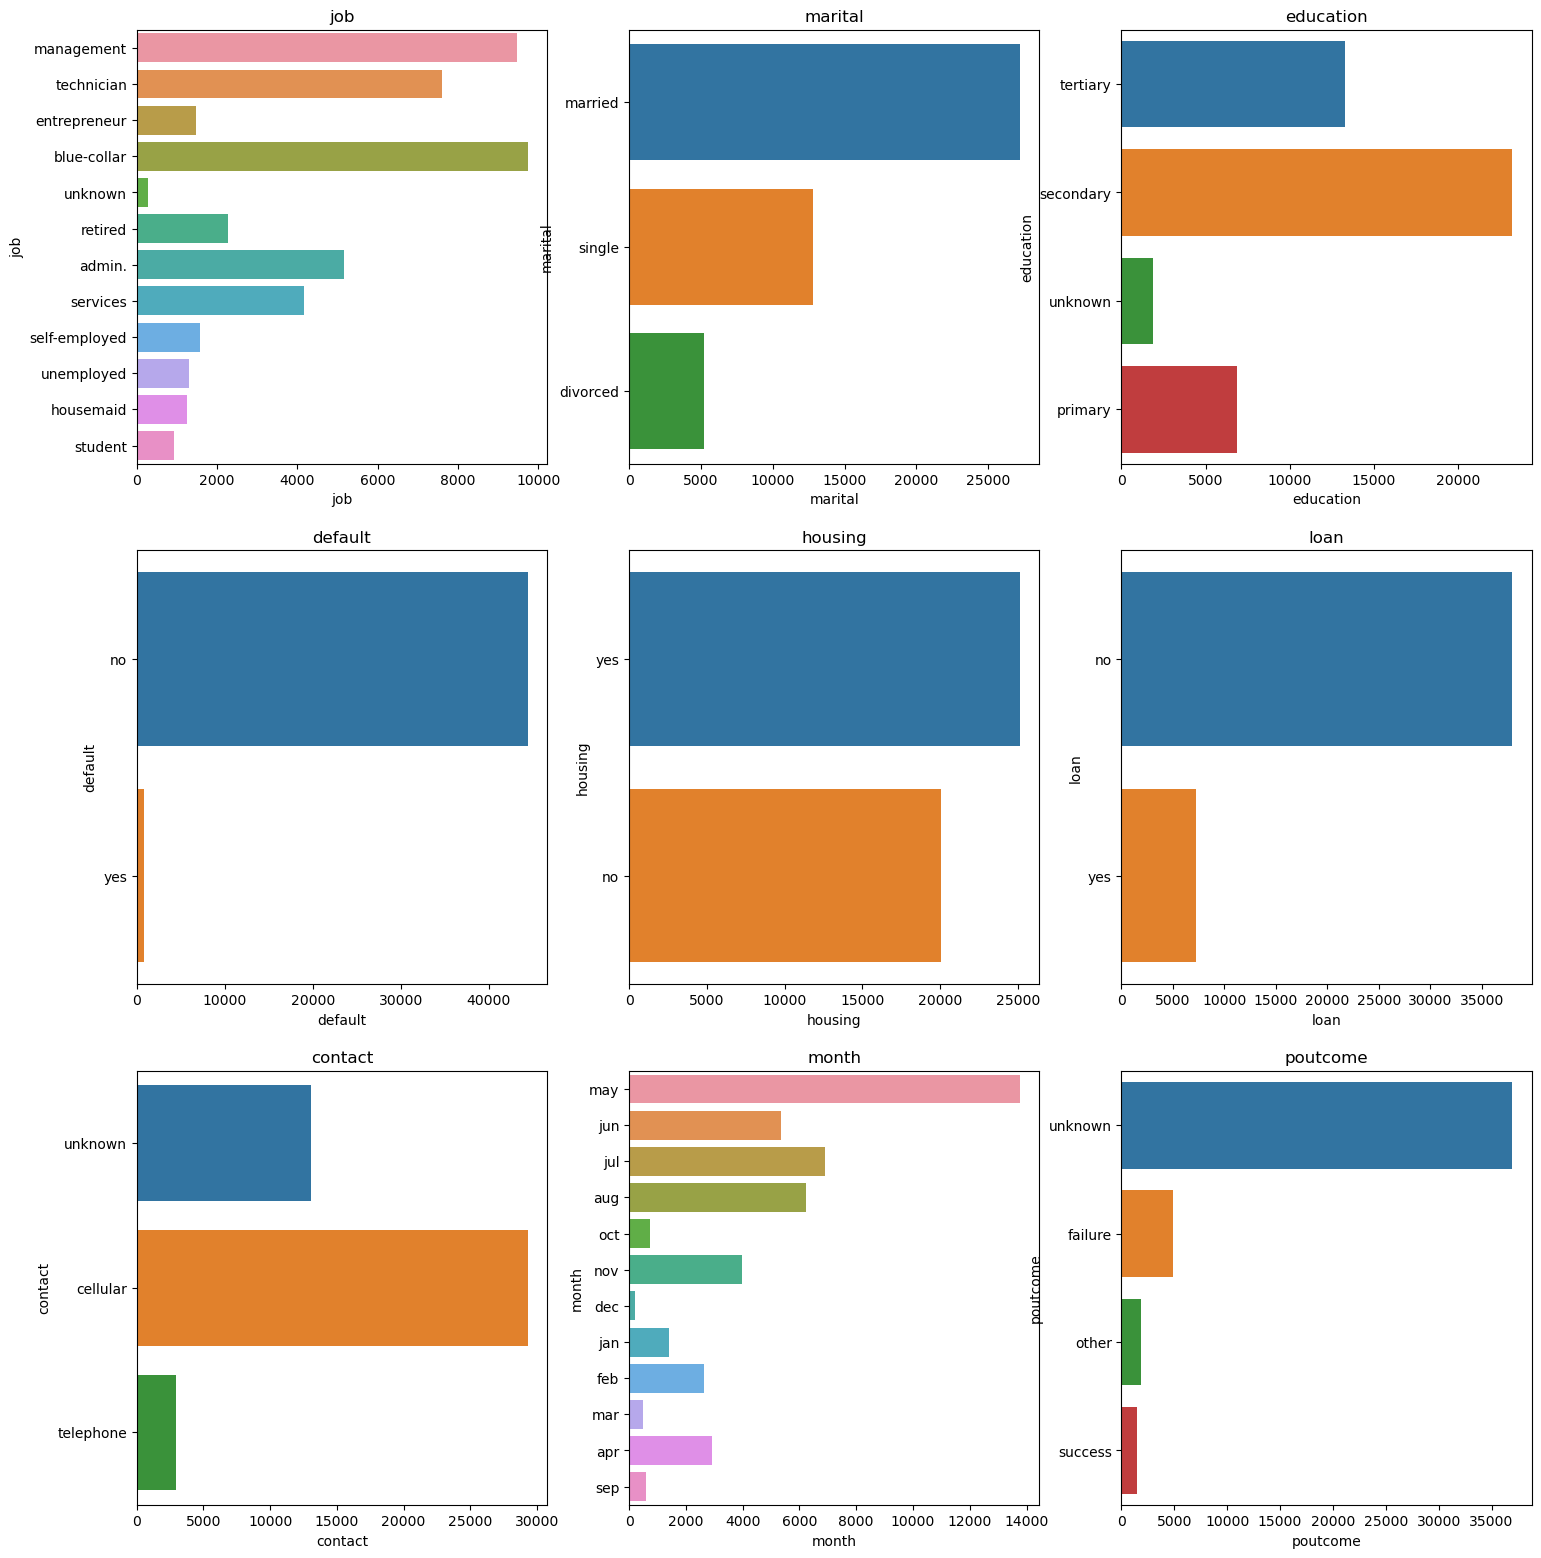

In [14]:
plt.figure(figsize=(18,80), facecolor="white")
plotnumb = 1
for cat in categorical_features:
    ax = plt.subplot(12,3, plotnumb)
    sns.countplot(y=cat, data=df_baru)
    plt.xlabel(cat)
    plt.title(cat)
    plotnumb += 1
plt.show()

**Ketereangan**<br>
* Client dengan job blue-collar memiliki records tertinggi dan Client dengan job student memiliki records terendah
* Client yang sudah menikah memiliki records tertinggi dan Client yang cerai memiliki records terendah
* Client yang memiliki latar belakang edukasi secondary memiliki records tertinggi dan Client yang memiliki latar belakang edukasi primary memiliki records terendah
* Record yes dan no pada feature default memiliki jarak rasio yang sangat jauh, sehingga feature ini tidak begitu penting dan bisa dihapus
* Client yang terakhir dihubungi pada bulan may memiliki records tertinggi dan Client yang terakhir dihubungi pada bulan dec memiliki records terendah

<AxesSubplot:>

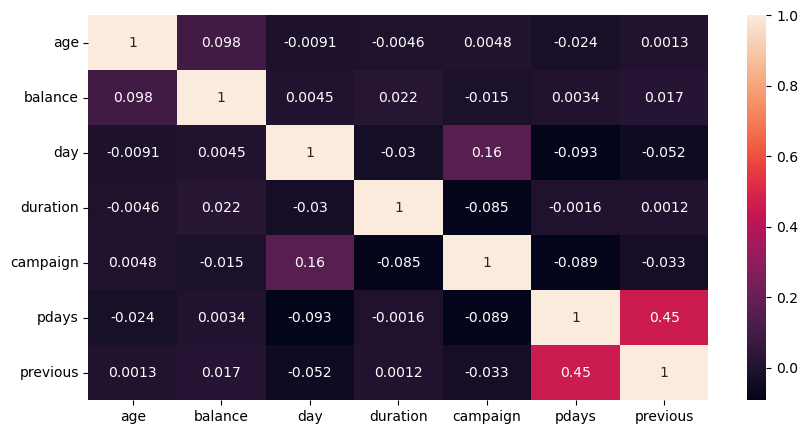

In [15]:
corr_mat = df_baru.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(corr_mat, annot=True)

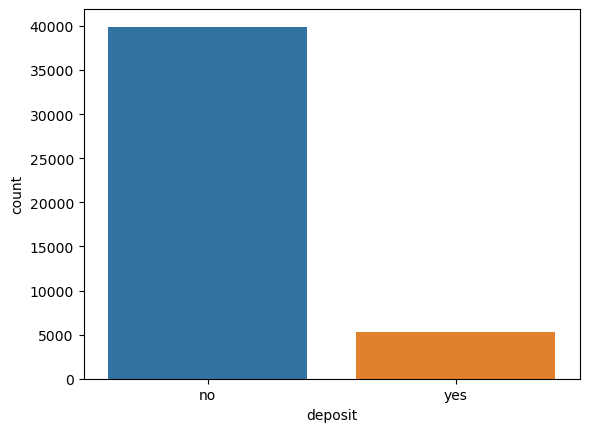

In [16]:
sns.countplot(x='deposit', data=df_baru)
plt.show()

# Classification

In [17]:
#Encode data yang bertipe data object/categorical features menggunakan get_dummies()
df_encoded = pd.get_dummies(df_baru, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"])
df_encoded

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.251940,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.251940,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.251940,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.251940,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.251940,no,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,977,0.076230,-0.411453,-0.251940,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,2.831227,0.120447,0.143418,456,-0.246560,-0.411453,-0.251940,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,2.925401,1.429593,0.143418,1127,0.721811,1.436189,1.050473,yes,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,1.512791,-0.228024,0.143418,508,0.399020,-0.411453,-0.251940,no,0,1,...,0,0,0,1,0,0,0,0,0,1


In [18]:
# mengganti data pada target(deposit)
df_encoded.deposit.replace(("yes", "no"), (1, 0), inplace=True)
df_encoded['deposit'].unique()

array([0, 1], dtype=int64)

In [19]:
# memisahkan Feature dan Target
df_feature = df_encoded.drop("deposit", axis=1)
df_target = df_encoded["deposit"]

In [26]:
# splitting data training dan data testing
data = X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.3)
print("Shape Training Feature:", X_train.shape)
print("Shape Testing Feature:", X_test.shape)
print("")
print("Shape Training Feature:", y_train.shape[0])
print("Shape Testing Feature:", y_test.shape[0])

Shape Training Feature: (31647, 51)
Shape Testing Feature: (13564, 51)

Shape Training Feature: 31647
Shape Testing Feature: 13564
